In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import Adam as adam
import matplotlib.pyplot as plt

Let's download the dataframe:

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

n_train, h, w, n_chan = tuple(train_x.shape)

170500096/170498071 [==============================] - 15s 0us/step


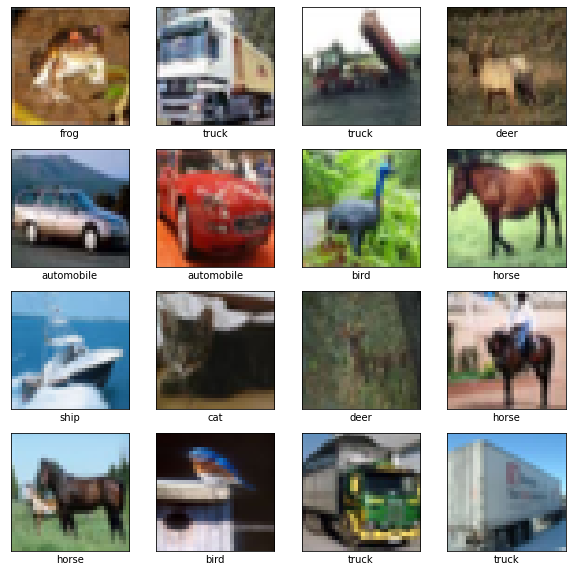

In [3]:
n_plot = 4  # set number of nodes per axis

plt.figure(figsize=(10,10))
for i in range(n_plot**2):
    plt.subplot(n_plot,n_plot,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i][0]])
plt.show()

And normalise the dependent variables, subtracting the mean brightness from each channel following scaling.

In [4]:
train_x, test_x = (train_x/127.5 - 1., test_x/127.5 - 1.)

Now we can begin assembling our model.

In [27]:
model = keras.Sequential([
    keras.layers.Conv2D(32, 2, activation='relu', input_shape=(h, w, n_chan)),
    keras.layers.Conv2D(32, 2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(.4),
    
    keras.layers.Conv2D(64, 2, activation='relu'),
    keras.layers.Conv2D(64, 2, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(.4),

    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='sigmoid'),
    keras.layers.Dropout(.4),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(len(class_names), activation='softmax')
    ])

my_opt = adam(lr=10**-4)

model.compile(optimizer=my_opt, 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 31, 31, 32)        416       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 30, 30, 32)        4128      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 13, 13, 64)        16448     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)        

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 25s 499us/sample - loss: 2.2936 - accuracy: 0.1418 - val_loss: 2.2622 - val_accuracy: 0.2063
Epoch 2/100
50000/50000 [==============================] - 19s 383us/sample - loss: 2.2362 - accuracy: 0.2261 - val_loss: 2.2072 - val_accuracy: 0.2521
Epoch 3/100
50000/50000 [==============================] - 19s 377us/sample - loss: 2.1982 - accuracy: 0.2727 - val_loss: 2.1712 - val_accuracy: 0.3041
Epoch 4/100
50000/50000 [==============================] - 19s 382us/sample - loss: 2.1733 - accuracy: 0.3016 - val_loss: 2.1473 - val_accuracy: 0.3252
Epoch 5/100
50000/50000 [==============================] - 19s 384us/sample - loss: 2.1537 - accuracy: 0.3214 - val_loss: 2.1271 - val_accuracy: 0.3414
Epoch 6/100
50000/50000 [==============================] - 19s 384us/sample - loss: 2.1355 - accuracy: 0.3372 - val_loss: 2.1132 - val_accuracy: 0.3527
Epoch 7/100
50000/50000 [=============

50000/50000 [==============================] - 19s 384us/sample - loss: 1.9262 - accuracy: 0.5404 - val_loss: 1.9121 - val_accuracy: 0.5487
Epoch 55/100
50000/50000 [==============================] - 19s 383us/sample - loss: 1.9245 - accuracy: 0.5419 - val_loss: 1.9103 - val_accuracy: 0.5503
Epoch 56/100
50000/50000 [==============================] - 19s 384us/sample - loss: 1.9230 - accuracy: 0.5434 - val_loss: 1.9103 - val_accuracy: 0.5501
Epoch 57/100
50000/50000 [==============================] - 19s 388us/sample - loss: 1.9212 - accuracy: 0.5457 - val_loss: 1.9062 - val_accuracy: 0.5561
Epoch 58/100
50000/50000 [==============================] - 19s 385us/sample - loss: 1.9186 - accuracy: 0.5486 - val_loss: 1.9036 - val_accuracy: 0.5587
Epoch 59/100
50000/50000 [==============================] - 19s 384us/sample - loss: 1.9177 - accuracy: 0.5491 - val_loss: 1.9038 - val_accuracy: 0.5581
Epoch 60/100
50000/50000 [==============================] - 19s 382us/sample - loss: 1.9159 - a

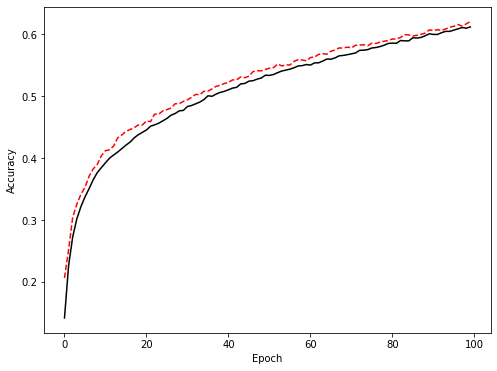

In [28]:
history = model.fit(train_x, train_y, epochs=10**2,  batch_size=5*10**2,
                    validation_data=(test_x, test_y), verbose=1)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['accuracy'], 'k', label='accuracy')
ax.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend

plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 391us/sample - loss: 1.8536 - accuracy: 0.6135 - val_loss: 1.8442 - val_accuracy: 0.6211
Epoch 2/100
50000/50000 [==============================] - 19s 379us/sample - loss: 1.8536 - accuracy: 0.6137 - val_loss: 1.8412 - val_accuracy: 0.6253
Epoch 3/100
50000/50000 [==============================] - 19s 379us/sample - loss: 1.8510 - accuracy: 0.6160 - val_loss: 1.8430 - val_accuracy: 0.6210
Epoch 4/100
50000/50000 [==============================] - 19s 376us/sample - loss: 1.8497 - accuracy: 0.6165 - val_loss: 1.8394 - val_accuracy: 0.6259
Epoch 5/100
50000/50000 [==============================] - 19s 381us/sample - loss: 1.8489 - accuracy: 0.6178 - val_loss: 1.8381 - val_accuracy: 0.6262
Epoch 6/100
50000/50000 [==============================] - 19s 381us/sample - loss: 1.8475 - accuracy: 0.6204 - val_loss: 1.8361 - val_accuracy: 0.6287
Epoch 7/100
50000/50000 [=============

50000/50000 [==============================] - 19s 381us/sample - loss: 1.8014 - accuracy: 0.6660 - val_loss: 1.8041 - val_accuracy: 0.6602s - los - ETA: 3s - loss: 1.803 - ETA: 1s - loss: 1.8021 
Epoch 54/100
50000/50000 [==============================] - 19s 382us/sample - loss: 1.7981 - accuracy: 0.6694 - val_loss: 1.8010 - val_accuracy: 0.6650
Epoch 55/100
50000/50000 [==============================] - 19s 382us/sample - loss: 1.7984 - accuracy: 0.6686 - val_loss: 1.8025 - val_accuracy: 0.6610
Epoch 56/100
50000/50000 [==============================] - 19s 381us/sample - loss: 1.7974 - accuracy: 0.6704 - val_loss: 1.8004 - val_accuracy: 0.6629
Epoch 57/100
50000/50000 [==============================] - 19s 384us/sample - loss: 1.7968 - accuracy: 0.6708 - val_loss: 1.8001 - val_accuracy: 0.6652
Epoch 58/100
50000/50000 [==============================] - 19s 384us/sample - loss: 1.7944 - accuracy: 0.6743 - val_loss: 1.8001 - val_accuracy: 0.6637
Epoch 59/100
50000/50000 [============

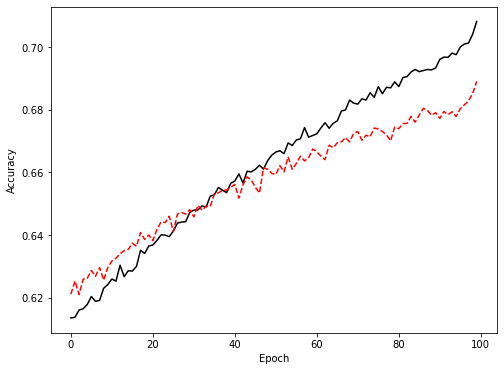

In [29]:
history = model.fit(train_x, train_y, epochs=10**2,  batch_size=5*10**2,
                    validation_data=(test_x, test_y), verbose=1)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['accuracy'], 'k', label='accuracy')
ax.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend

plt.show()